In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mar del plata ar
mount isa au
nikolskoye ru
vaini to
santa maria cv
aguililla mx
palana ru
litovko ru
fukue jp
bluff nz
albany au
haines junction ca
chara ru
albany au
puerto ayora ec
arraial do cabo br
doka sd
mahibadhoo mv
new norfolk au
albany au
hobart au
san patricio mx
tadine nc
puerto ayora ec
adrar dz
atuona pf
kapaa us
cap malheureux mu
georgetown sh
mataura pf
muros es
narsaq gl
longyearbyen sj
leningradskiy ru
umarkot in
takhtamygda ru
constantine dz
tema gh
kamenskoye ru
araouane ml
chuy uy
westport ie
punta arenas cl
mataura pf
port blair in
taolanaro mg
cape town za
kuching my
port elizabeth za
hermanus za
atuona pf
port alfred za
mount isa au
upernavik gl
lompoc us
mamakan ru
illoqqortoormiut gl
hobyo so
victoria sc
jamestown sh
punta arenas cl
pevek ru
bluff nz
itarema br
saskylakh ru
barentsburg sj
srednekolymsk ru
hithadhoo mv
avarua ck
hualmay pe
barrow us
cape town za
carnarvon au
saint-philippe re
dong hoi vn
lompoc us
ileza ru
wanaka nz
hofn is
cape town za
karrat

kattivakkam in
barrow us
palabuhanratu id
tuktoyaktuk ca
busselton au
petropavlovsk-kamchatskiy ru
saskylakh ru
mataura pf
avarua ck
albany au
puerto ayora ec
busselton au
barrow us
san juan ar
mataura pf
guajara-mirim br
arraial do cabo br
qaanaaq gl
ancud cl
butaritari ki
kapaa us
tingi tz
isangel vu
puerto ayora ec
labytnangi ru
provideniya ru
ballina au
rikitea pf
mys shmidta ru
busselton au
attawapiskat ca
rikitea pf
hithadhoo mv
ushuaia ar
teguise es
puerto ayora ec
pangody ru
atuona pf
ocosingo mx
ushuaia ar
tuktoyaktuk ca
banda aceh id
lorengau pg
vardo no
los llanos de aridane es
mataura pf
prince rupert ca
dikson ru
tucumcari us
dunajska streda sk
husavik is
puerto ayora ec
keti bandar pk
rikitea pf
roma au
guozhen cn
acarau br
mys shmidta ru
busselton au
cape town za
pevek ru
vardo no
port elizabeth za
lompoc us
severo-kurilsk ru
magaria ne
vaini to
baturaja id
padang id
qeshm ir
ngama td
provideniya ru
qaanaaq gl
beyneu kz
zhuhai cn
new norfolk au
ushuaia ar
evanston us
des

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc47bd5b46e512956e646f26cba750e


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | santa maria
Processing Record 6 of Set 1 | aguililla
Processing Record 7 of Set 1 | palana
Processing Record 8 of Set 1 | litovko
Processing Record 9 of Set 1 | fukue
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | haines junction
Processing Record 13 of Set 1 | chara
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | doka
Processing Record 17 of Set 1 | mahibadhoo
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | tadine
Processing Record 22 of Set 1 | adrar
Processing Record 23 of Set 1 | atuo

Processing Record 38 of Set 4 | atagay
Processing Record 39 of Set 4 | rodrigues alves
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | monrovia
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | itacare
Processing Record 46 of Set 4 | pacifica
Processing Record 47 of Set 4 | jawa
Processing Record 48 of Set 4 | baracoa
Processing Record 49 of Set 4 | totness
Processing Record 50 of Set 4 | mirina
City not found. Skipping...
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | olafsvik
Processing Record 3 of Set 5 | bardiyah
Processing Record 4 of Set 5 | inveraray
City not found. Skipping...
Processing Record 5 of Set 5 | dickinson
Processing Record 6 of Set 5 | bartica
Processing Record 7 of Set 5 | castro
Processing Record 8 of Set 5 | erzin
Processing Record 9 of Set 5 | butaritari
Processing Record 10 of Set 5 | salekhard
Processing R

Processing Record 27 of Set 8 | los llanos de aridane
Processing Record 28 of Set 8 | paracuru
Processing Record 29 of Set 8 | kattivakkam
Processing Record 30 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 32 of Set 8 | san juan
Processing Record 33 of Set 8 | guajara-mirim
City not found. Skipping...
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | tingi
Processing Record 36 of Set 8 | isangel
Processing Record 37 of Set 8 | labytnangi
Processing Record 38 of Set 8 | ballina
Processing Record 39 of Set 8 | teguise
Processing Record 40 of Set 8 | ocosingo
Processing Record 41 of Set 8 | banda aceh
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | vardo
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | tucumcari
Processing Record 46 of Set 8 | dunajska streda
Processing Record 47 of Set 8 | husavik
Processing Record 48 of Set 8 | keti

Processing Record 15 of Set 12 | kragero
Processing Record 16 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 12 | barreiras
Processing Record 18 of Set 12 | jeremie
Processing Record 19 of Set 12 | talnakh
Processing Record 20 of Set 12 | rafaela
Processing Record 21 of Set 12 | magugu
Processing Record 22 of Set 12 | bontang
Processing Record 23 of Set 12 | jimo
Processing Record 24 of Set 12 | meulaboh
Processing Record 25 of Set 12 | mombetsu
Processing Record 26 of Set 12 | faanui
Processing Record 27 of Set 12 | grimshaw
Processing Record 28 of Set 12 | puerto del rosario
Processing Record 29 of Set 12 | malanje
Processing Record 30 of Set 12 | lewisville
Processing Record 31 of Set 12 | eureka
Processing Record 32 of Set 12 | marblehead
Processing Record 33 of Set 12 | prince george
Processing Record 34 of Set 12 | padre bernardo
Processing Record 35 of Set 12 | havelock
Processing Record 36 of Set 12 | tommot
Processing Record 37 of Set 12 | ryots

In [9]:
len(city_data)

575

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,64.42,63,20,23.02,AR,2022-02-12 15:07:29
1,Mount Isa,-20.7333,139.5000,74.97,78,40,10.36,AU,2022-02-12 15:09:50
2,Nikolskoye,59.7035,30.7861,34.88,87,100,11.90,RU,2022-02-12 15:09:51
3,Vaini,-21.2000,-175.2000,78.96,94,20,4.61,TO,2022-02-12 15:09:51
4,Santa Maria,-29.6842,-53.8069,95.81,27,82,7.85,BR,2022-02-12 15:09:52
5,Aguililla,18.7333,-102.7333,68.07,36,42,3.11,MX,2022-02-12 15:09:52
6,Palana,59.1167,159.9667,-11.67,96,38,4.18,RU,2022-02-12 15:09:53
7,Litovko,49.2361,135.1742,13.28,97,100,1.48,RU,2022-02-12 15:09:53
8,Fukue,32.6881,128.8419,50.25,85,100,9.40,JP,2022-02-12 15:09:53
9,Bluff,-46.6000,168.3333,51.80,65,81,15.10,NZ,2022-02-12 15:09:54


In [16]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", \
                             "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-02-12 15:07:29,-38.0023,-57.5575,64.42,63,20,23.02
1,Mount Isa,AU,2022-02-12 15:09:50,-20.7333,139.5000,74.97,78,40,10.36
2,Nikolskoye,RU,2022-02-12 15:09:51,59.7035,30.7861,34.88,87,100,11.90
3,Vaini,TO,2022-02-12 15:09:51,-21.2000,-175.2000,78.96,94,20,4.61
4,Santa Maria,BR,2022-02-12 15:09:52,-29.6842,-53.8069,95.81,27,82,7.85
5,Aguililla,MX,2022-02-12 15:09:52,18.7333,-102.7333,68.07,36,42,3.11
6,Palana,RU,2022-02-12 15:09:53,59.1167,159.9667,-11.67,96,38,4.18
7,Litovko,RU,2022-02-12 15:09:53,49.2361,135.1742,13.28,97,100,1.48
8,Fukue,JP,2022-02-12 15:09:53,32.6881,128.8419,50.25,85,100,9.40
9,Bluff,NZ,2022-02-12 15:09:54,-46.6000,168.3333,51.80,65,81,15.10


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

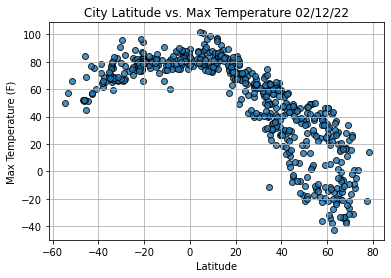

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

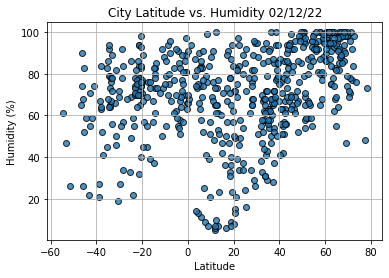

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

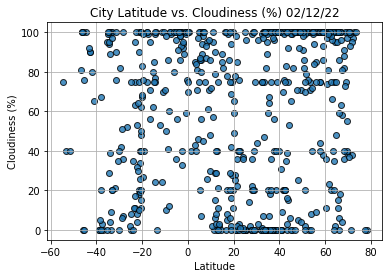

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

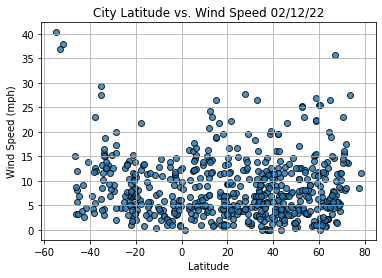

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

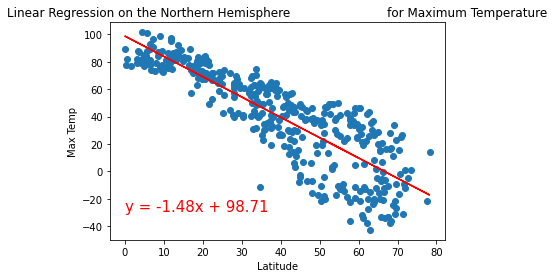

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-29))

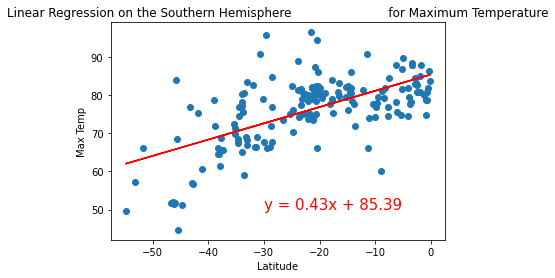

In [38]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,50))

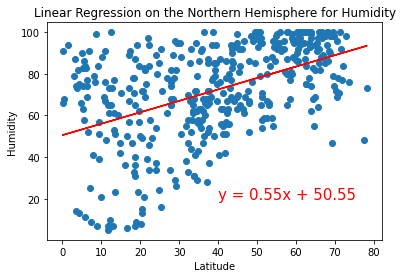

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Humidity', \
                       'Humidity',(40,20))

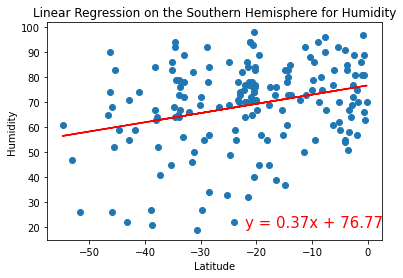

In [52]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Humidity', \
                       'Humidity',(-22,20))

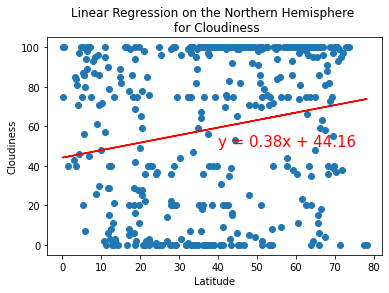

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', \
                       'Cloudiness',(40,50))

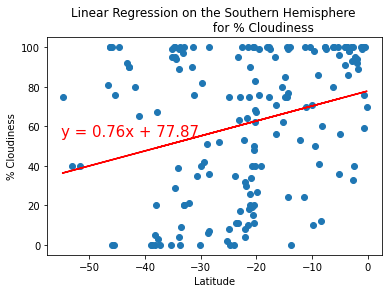

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-55,55))

In [ ]:
#The correlation between the latitude and percent cloudiness is very low because the r-value \ 
is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere
#for the plots shown here. This means that cloudiness is unpredictable due to changing weather \
patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 


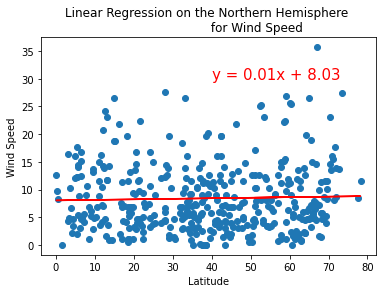

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(40,30))

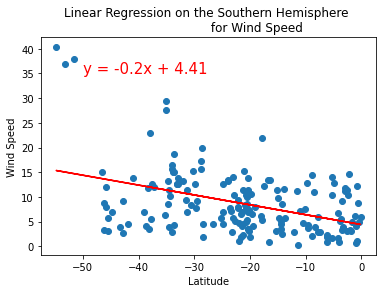

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,35))